In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


In [16]:
mpl.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams["mathtext.default"] = 'regular'
mpl.rcParams['pdf.fonttype'] = 42
# This is for using seaborn
sns.set_theme(style="white")
sns.set_style('ticks')

In [17]:
sheets=["SHA", "QIA", "JA", "ashes", "spider"]
colors = ["black", "#c95428"]
save_path = '../plots/'

In [18]:
df = pd.read_excel("../manuscript_data.xlsx", sheet_name=sheets[1])
df.head(3)

,sample,depth,lithology,age,d13C,Hg,TOC,TOC_RE,Hg_TOC,Al,...,D200_se,D201Hg,D201_se,Corg,Mo,U,Unnamed: 23,Position,sample_nos,dCorg
0,Q156c,0.1,carbonate,Middle Smithian,-2.14,6.42,NaN,NaN,NaN,2.560434,...,NaN,NaN,NaN,NaN,NaN,7.0,NaN,8.55,QIA 166 RV,-30.682836
1,Q157,0.7,carbonate,Middle Smithian,-2.24,4.10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.90,QIA 45,-29.442706
2,Q22,1.4,carbonate,Middle Smithian,-2.28,8.15,0.07,NaN,NaN,NaN,...,NaN,NaN,NaN,-29.38328,NaN,NaN,NaN,12.40,QIA 164 RV,-27.208423


In [19]:
qia_summary = df.describe()
qia_summary.to_excel("../summary.xlsx", sheet_name='Qiakong')


In [20]:
Hg_TOC=df["Hg_TOC"]
depth = df["depth"]
TOC = df["TOC"]
d202Hg=df["d202Hg"]
err202=df["d202_se"]
D199 = df["D199Hg"]
err199=df["D199_se"]
D200 = df["D200Hg"]
err200=df["D200_se"]
d13C = df["d13C"]
Hg=df["Hg"]

meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


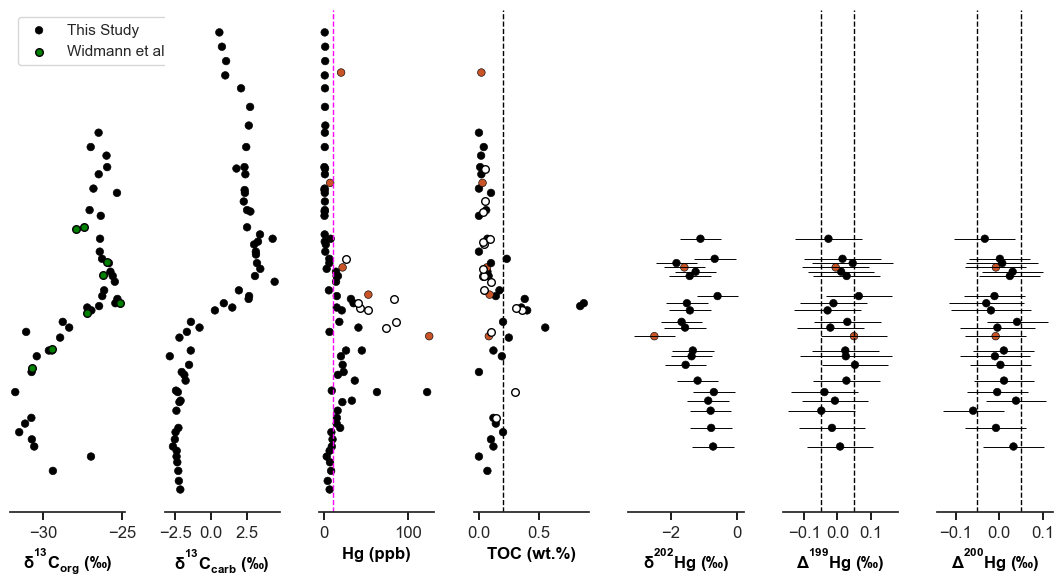

In [21]:
fig, axes = plt.subplots(figsize=(11, 5.66),  # constrained_layout=True,
                         ncols=7, nrows=1, sharey=True)
ax0, ax1, ax2, ax3, ax4, ax5, ax6 = axes
sns.despine(left=True, right=True, top=True, bottom=False)
plt.yticks([])
plt.tight_layout()
ax= [ax0, ax1, ax2, ax3, ax4, ax5, ax6]

x_ticks = [[-31, -28, -25], [-2, 0, 2, 4], [0, 50, 100],
           [0, .4, .8], [0, -1, -2, -3], [-0.1, 0, .1], [-0.1, 0, .1]]
subs = ['Corg', 'd13C', 'Hg', 'TOC', 'd202Hg', 'D199Hg', 'D200Hg']
ax= [ax0, ax1, ax2, ax3, ax4, ax5, ax6]
xlabels = ["$\delta^{13}C_{org}\;(‰)$", "$\delta^{13}C_{carb}\;(‰)$", "Hg (ppb)", "TOC (wt.%)",
           "$\delta^{202}Hg\;(‰)$", "$\Delta^{199}Hg\;(‰)$", "$\Delta^{200}Hg\;(‰)$"]
err= ["d202_se", "D199_se", "D200_se"]
err_subs = [d202Hg, D199, D200]
ax_2=[ax4, ax5, ax6]

# make the subplots using a for loop.
for ix, sub in enumerate(subs):
    sns.scatterplot(data=df, x=df[sub], y=depth, ax=ax[ix],
                    color='black', legend=False, edgecolor='black',
                    s=30, hue="lithology", palette=colors
                    )
    ax[ix].tick_params(labelsize=12, color='black')
    ax[ix].set_xlabel(xlabels[ix], fontsize=12, c="black", fontweight="bold")
    # ax[ix].set_xticks(x_ticks[ix], labelsize=12)

# add error bars to Hg-isotope subplots
for ix, sub in enumerate(err):
    ax_2[ix].errorbar(xerr=df[sub], y=depth, x=err_subs[ix], ecolor="black", color="black",
                      linestyle='none', elinewidth=0.7, capthick=0.5, mec='black')

# add rock-eval TOC plot to axes 3
ax3.scatter(df['TOC_RE'], depth, s=30, color="white", edgecolor="black")
# add Hg/TOC plot to axes 2
ax2.scatter(Hg_TOC, depth, s=30, color="white", edgecolor="black")

# add Widmann 2020 d13Corg data to axis 0
ax0.scatter(df['dCorg'], df['Position'], s=30, color="green", edgecolor="black")
ax0.legend(loc="upper left", labels=["This Study", "Widmann et al. (2020)"])

# show cut-off points.
x = [10, .2, 0.05, -0.05, 0.05, -0.05]
ax_3 = [ax2, ax3, ax5, ax5, ax6, ax6]
col = ['fuchsia', 'black', 'black', 'black', 'black', 'black']

for i in range(len(x)):
    ax_3[i].axvline(x[i], linestyle = '--', color = col[i], linewidth=1)
    
plt.savefig("../plots/qiakong_all.pdf", dpi=600)


In [22]:
Al = df['Al']
Fe_Al = df['Fe']/Al
U_Al = df['U']/Al
Hg_Al = Hg/Al
Hg_Fe = Hg/df['Fe']
Mo = df['Mo']/Al


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


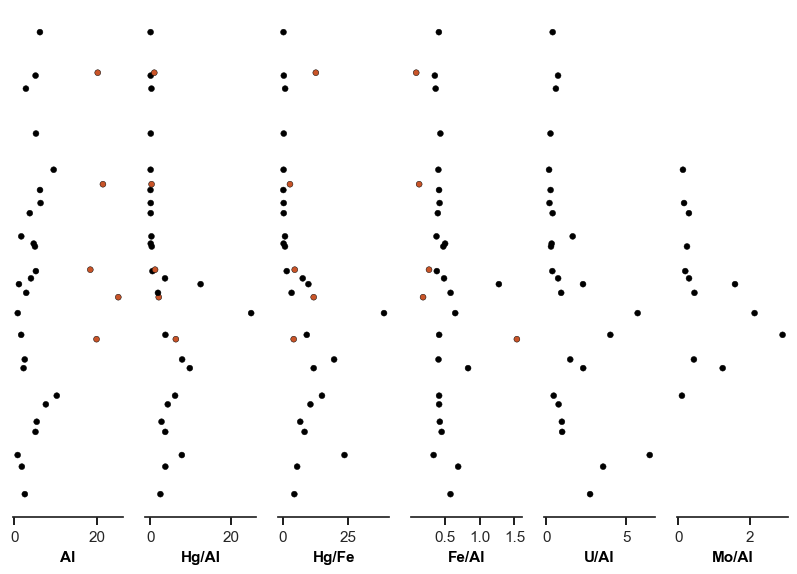

In [23]:
fig, axes = plt.subplots(figsize=(10, 6.6), nrows=1, ncols=6, sharey=True)
ax0, ax1, ax2, ax3, ax4, ax5 = axes
ax_list = [ax0, ax1, ax2, ax3, ax4, ax5]
plt_list = [Al, Hg_Al, Hg_Fe, Fe_Al, U_Al, Mo]
labels = ["Al", "Hg/Al", "Hg/Fe", "Fe/Al", "U/Al", "Mo/Al"]
# xticks = [[1, 2, 3, 4, 5, 6, 7], [0, 10, 20]]
# remove the y-axis ticks and y-axis itself.
sns.despine(left=True, right=True, top=True, bottom=False)
plt.yticks([])


def make_plot(data, f_size, f_name):
    for i in range(len(ax_list)):
        sns.scatterplot(data=data, x=plt_list[i], y=depth, ax=ax_list[i],
                        color='black', legend=False, edgecolor='black',
                        size=20, hue='lithology', palette=colors,
                        )
        ax_list[i].tick_params(labelsize=f_size, color='black')
        # ax_list[i].set_xticks(xticks[i])
        ax_list[i].set_xlabel(labels[i], fontsize=f_size,
                              c="black", fontweight="bold")
    plt.savefig(f'{save_path}{f_name}.pdf')


make_plot(df, 11, 'qia_supplement')

Create plots with lowess smoothing.

In [24]:
import numpy as np
import pylab
import seaborn as sns
import statsmodels.api as sm

In [25]:
x=df["depth"]
y=df['Hg']
smoothed = sm.nonparametric.lowess(exog=x, endog=y, frac=.13)
# smoothed

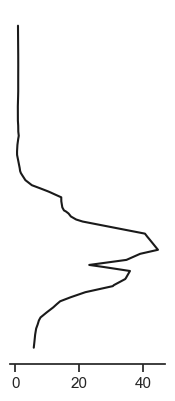

In [26]:
# fig, axes = plt.subplots(figsize=(2, 4.6),
#                          ncols=1, nrows=1, sharey=True)
# ax0 = axes
fig, ax = pylab.subplots(figsize=(2, 4.6),)
sns.despine(left=True, right=True, top=True, bottom=False)
plt.yticks([])
# Hg
# c = sns.scatterplot(y=smoothed[:,0], x=smoothed[:, 1], ax=ax0,
#                     color="black", legend=False, edgecolor="black",
#                     size=20)
# c.set_xlabel("Hg (ppb)", fontsize=10, c="black", fontweight="bold")
ax.plot(smoothed[:, 1], smoothed[:, 0], c='k')
